# Butternut Box - Technical Assessment - Braulio de la Calle
------------------------------------

# Structure:

#### 1) Data cleaning:
    
- Inspecting variables   
    


#### 2) Test 1:

- Interesting metrics



#### 3) Conclusion:

- XXX

# 1. Data cleaning

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import math
%matplotlib inline
import sys
sys.path.append('..')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

### Read file

In [2]:
data = pd.read_csv('../Data/bb_data.csv', delimiter=';')
data.head(3)

,id,variation_name,status,deliveries_received,channel,created_at,has_dog_profile,dog_age_group_sign_up,box_one_delivery_date,days_between_box_one_and_two,lifetime_revenue,lifetime_value,add_ons_lifetime_revenue
0,152143,without_paypal,1,1,raf,2021-01-13 11:34:40,False,puppy,2021-01-14,NaN,8.750,-4.526250,0.0
1,150257,without_paypal,0,2,digital,2021-01-01 21:33:05,True,puppy,2021-01-07,14.0,21.000,3.124000,0.0
2,151598,without_paypal,0,2,raf,2021-01-10 12:53:13,False,puppy,2021-01-14,14.0,22.775,1.733596,0.0


### Check for null values

In [3]:
data.isnull().sum()

id                                 0
variation_name                     0
status                             0
deliveries_received                0
channel                            0
created_at                         0
has_dog_profile                    0
dog_age_group_sign_up              0
box_one_delivery_date            135
days_between_box_one_and_two    1709
lifetime_revenue                   0
lifetime_value                     0
add_ons_lifetime_revenue           0
dtype: int64

## a) Inspecting variables

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4269 non-null   int64  
 1   variation_name                4269 non-null   object 
 2   status                        4269 non-null   int64  
 3   deliveries_received           4269 non-null   int64  
 4   channel                       4269 non-null   object 
 5   created_at                    4269 non-null   object 
 6   has_dog_profile               4269 non-null   bool   
 7   dog_age_group_sign_up         4269 non-null   object 
 8   box_one_delivery_date         4134 non-null   object 
 9   days_between_box_one_and_two  2560 non-null   float64
 10  lifetime_revenue              4269 non-null   float64
 11  lifetime_value                4269 non-null   float64
 12  add_ons_lifetime_revenue      4269 non-null   float64
dtypes: 

In [5]:
numeric_vars = ['id','status','deliveries_received', 'days_between_box_one_and_two','lifetime_revenue','lifetime_value','add_ons_lifetime_revenue']
categ_vars = ['channel','dog_age_group_sign_up']
date_vars = ['created_at', 'box_one_delivery_date']
bool_vars = ['has_dog_profile']

In [6]:
data = data.copy() # To avoid warning message
data.created_at = pd.to_datetime(data.created_at)
data.box_one_delivery_date = pd.to_datetime(data.box_one_delivery_date)

In [7]:
bool_1 = data.variation_name=='with_paypal'
with_pp = data[bool_1].reset_index()
with_pp.head(3)

,index,id,variation_name,status,deliveries_received,channel,created_at,has_dog_profile,dog_age_group_sign_up,box_one_delivery_date,days_between_box_one_and_two,lifetime_revenue,lifetime_value,add_ons_lifetime_revenue
0,16,149107,with_paypal,1,2,raf,2020-12-23 11:26:55,False,adult,2020-12-29,12.0,20.75,-6.98575,1.354475
1,22,151655,with_paypal,1,1,ambassador,2021-01-10 17:50:53,False,adult,2021-01-12,NaN,0.00,-11.74500,0.000000
2,25,150530,with_paypal,1,1,ambassador,2021-01-03 16:33:54,False,adult,2021-01-05,NaN,1.65,-4.36690,0.000000


In [8]:
bool_2 = data.variation_name=='without_paypal'
no_pp = data[bool_2].reset_index()
no_pp.head(3)

,index,id,variation_name,status,deliveries_received,channel,created_at,has_dog_profile,dog_age_group_sign_up,box_one_delivery_date,days_between_box_one_and_two,lifetime_revenue,lifetime_value,add_ons_lifetime_revenue
0,0,152143,without_paypal,1,1,raf,2021-01-13 11:34:40,False,puppy,2021-01-14,NaN,8.750,-4.526250,0.0
1,1,150257,without_paypal,0,2,digital,2021-01-01 21:33:05,True,puppy,2021-01-07,14.0,21.000,3.124000,0.0
2,2,151598,without_paypal,0,2,raf,2021-01-10 12:53:13,False,puppy,2021-01-14,14.0,22.775,1.733596,0.0


In [9]:
print(with_pp.shape)
print(no_pp.shape)

(2120, 14)
(2149, 14)


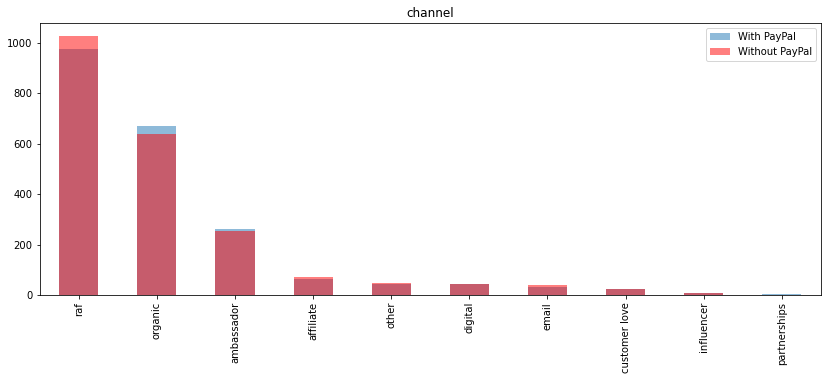

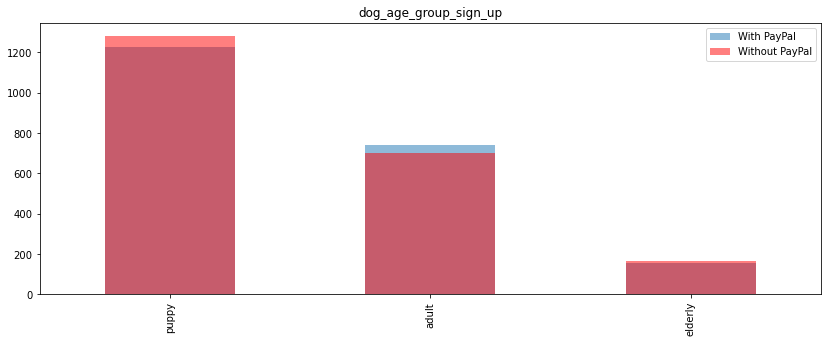

In [10]:
for cat in categ_vars:
    plt.figure(figsize=(14,5))
    with_pp[cat].value_counts().plot.bar(alpha=0.5, label= 'With PayPal')
    no_pp[cat].value_counts().plot.bar(color='Red', alpha=0.5, label= 'Without PayPal')
    plt.title(cat)
    plt.legend()
    plt.show()

# for cat in categ_vars:
#     with_pp[cat].value_counts().plot.bar()
#     plt.title('With PayPal - ' + cat)
#     plt.show()
    
#     no_pp[cat].value_counts().plot.bar(color='r')
#     plt.title('Without PayPal - ' + cat)
#     plt.show()

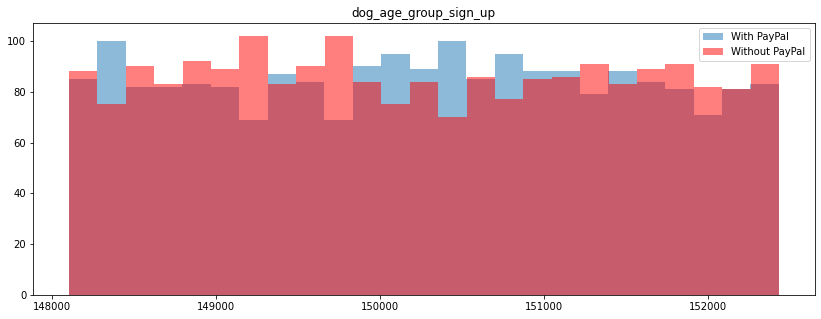

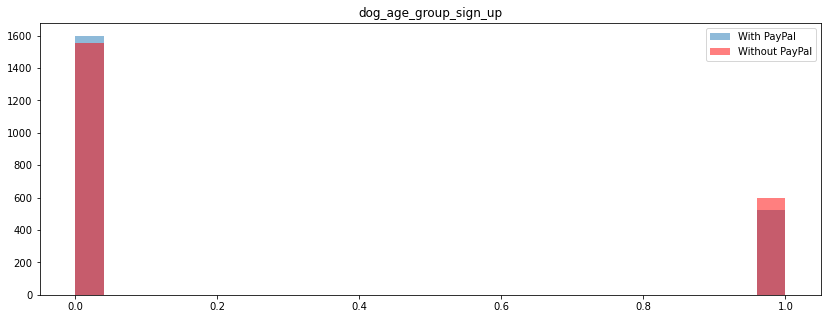

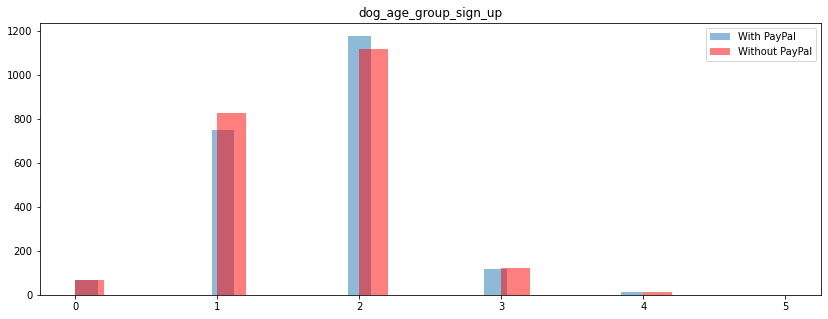

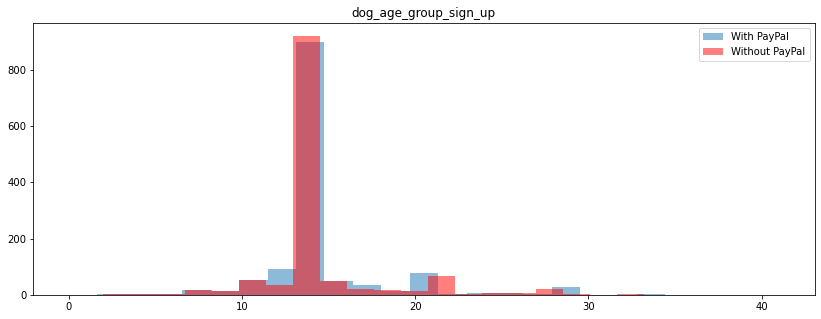

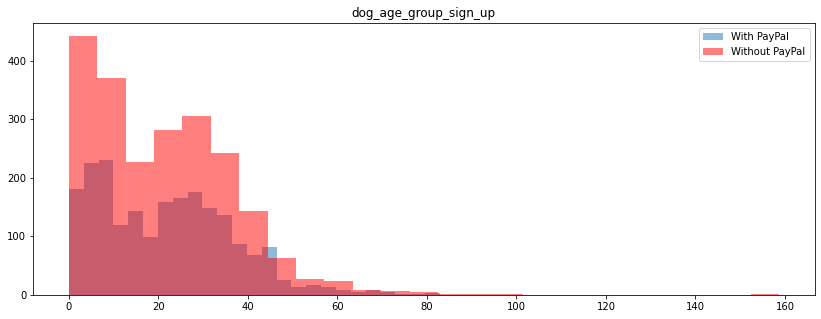

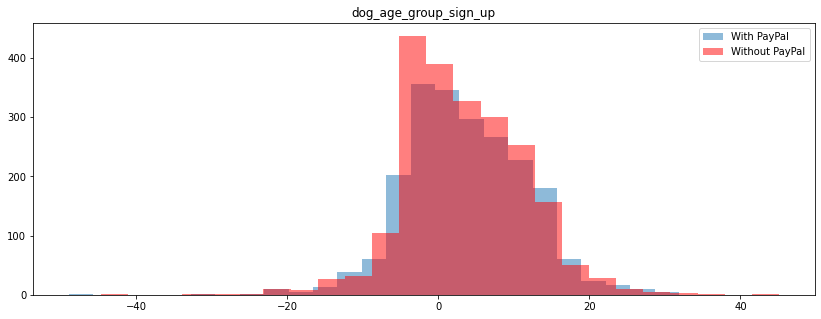

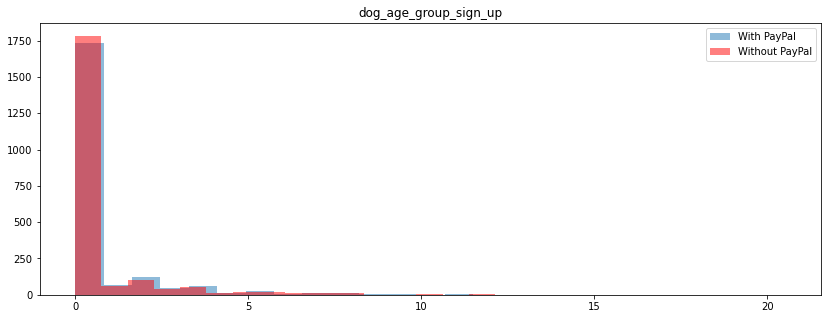

In [11]:
for num in numeric_vars:
    plt.figure(figsize=(14,5))
    plt.hist(with_pp[num], alpha=0.5, label= 'With PayPal', bins=25)
    plt.hist(no_pp[num], color='Red', alpha=0.5, label= 'Without PayPal', bins=25)
    plt.title(cat)
    plt.legend()
    plt.show()
    
# for num in numeric_vars:
#     plt.hist(with_pp[num])
#     plt.title('With PayPal - ' + num)
#     plt.show()
    
#     plt.hist(no_pp[num], color='r')
#     plt.title('Without PayPal - ' + num)
#     plt.show()

# 2. Test
## a) Interesting metrics

### Hypothesis testing

H0: Metric(A) == Metric(B)

H1: Metric(A) != Metric(B)

≈

### Example: Average LTV

H0: LTV(A) == LTV(B)

H1: LTV(A) != LTV(B)


# (Intentamos el método de Udacity)

In [12]:
# Función que te da todo lo necesario sobre la métrica

def metric_info (numerator, denominator):
    x_control = data[data.variation_name=='without_paypal'][numerator].sum()
    n_control = data[data.variation_name=='without_paypal'][numerator].shape[0]
    x_experiment = data[data.variation_name=='with_paypal'][denominator].sum()
    n_experiment = data[data.variation_name=='with_paypal'][denominator].shape[0]
    pooled_prob = (x_control+x_experiment)/(n_control+n_experiment)
    pooled_se = (   pooled_prob*(1-pooled_prob)*(1/n_control+1/n_experiment)   )**0.5
    prob_control = x_control/n_control
    prob_experiment = x_experiment/n_experiment
    prob_difference = prob_experiment - prob_control
    prob_increase = prob_experiment/prob_control-1
    margin_error = pooled_se*1.96
    diff_ci_plus_95 = round(0+margin_error, 5)
    diff_ci_minus_95 = round(0-margin_error, 5)
    if (prob_difference>diff_ci_plus_95) or (prob_difference<diff_ci_minus_95):
        return [str(numerator)+'/'+str(denominator), prob_control, prob_experiment, prob_increase, prob_difference, round(pooled_se,4), diff_ci_minus_95, diff_ci_plus_95, 'Yes']
    else:
        return [str(numerator)+'/'+str(denominator), prob_control, prob_experiment, prob_increase, prob_difference, round(pooled_se,4), diff_ci_minus_95, diff_ci_plus_95, 'No']

### Aquí vemos que se complica el asunto porque no se puede hacer la raíz de un número negativo

In [13]:
metric_info('lifetime_value','lifetime_value')

<ipython-input-12-31c6b8a78c01>:9: RuntimeWarning: invalid value encountered in double_scalars
  pooled_se = (   pooled_prob*(1-pooled_prob)*(1/n_control+1/n_experiment)   )**0.5


['lifetime_value/lifetime_value',
 3.3659615965030243,
 3.4915825039462267,
 0.03732095683257741,
 0.12562090744320242,
 nan,
 nan,
 nan,
 'No']

In [14]:
# comprobamos que efectivamente es negativo

x_control = data[data.variation_name=='without_paypal']['lifetime_value'].sum()
n_control = data[data.variation_name=='without_paypal']['lifetime_value'].shape[0]
x_experiment = data[data.variation_name=='with_paypal']['lifetime_value'].sum()
n_experiment = data[data.variation_name=='with_paypal']['lifetime_value'].shape[0]
pooled_prob = (x_control+x_experiment)/(n_control+n_experiment)
print(pooled_prob)
print(pooled_prob*(1-pooled_prob)*(1/n_control+1/n_experiment)) 

3.4283453687634107
-0.007800975216664704


# (Intentamos el método de BV)

### Creo que así es como lo hemos hecho con Paco anteriormente (lo he metido en una función como te enseñé cuando estaba por ahí para poder hacer los tests que quiera imprimiendo el gráfico ese chulo)

In [15]:
def ab_test_mean_difference (column):
    
    # Initial difference
    metric_a = data.loc[data.variation_name=='without_paypal', column].mean()
    metric_b = data.loc[data.variation_name=='with_paypal', column].mean()
    initial_diff = metric_b - metric_a
    
    # Sampling distribution
    differences = []
    for n in list(range(1,1001)):
        sample_a = data.sample(data[data.variation_name=='without_paypal'].shape[0], replace=True)
        sample_b = data.sample(data[data.variation_name=='with_paypal'].shape[0], replace=True)
        s_a_metric = sample_a[column].mean()    
        s_b_metric = sample_b[column].mean()    
        diff = s_b_metric-s_a_metric
        differences.append(diff)
        
    # Calculate p value
    extreme = []
    for element in differences:
        if element >= initial_diff:
            extreme.append(1)
        else:
            extreme.append(0)
    p_value = sum(extreme)/len(extreme)
    if p_value >= 0.5:
        p_value_2 = 1 - p_value
    else:
        p_value_2 = p_value
    p_value_2 = round(p_value_2, 3)
    
    # Plot the result
    plt.figure(figsize=(10,6))
    pd.Series(differences).plot.hist(alpha=0.8, label='Sampling distribution')
    plt.title('p value: '+ str(p_value_2))
    plt.axvline(pd.Series(differences).mean(), label="Samples' mean difference", color='Green')
    plt.axvline(initial_diff, label= 'Initial difference', color = 'Red')    
    plt.axvline(np.percentile(differences, 97.5), color='Orange', label= 'Confidence interval ')
    plt.axvline(np.percentile(differences, 2.5), color='Orange')
    plt.legend()
    return plt.show()

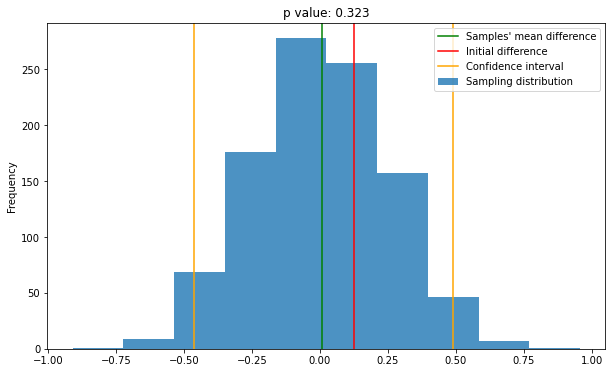

In [16]:
ab_test_mean_difference('lifetime_value')

# Conclusión
Parece que sí es significativamente mejor tener PayPal

# Next Steps
- Hacer lo mismo para el Box 2 Retention (no se lo que es).
- Pensar qué otros insights pueden ser useful, se me ocurre:
    - Entrenar un modelo para ver el feature importance respecto al LTV que es la cifra que queremos optimizar quizas?.
    - Quizas algun grafico como los que hemos impreso arriba                

## Initial difference

In [30]:
bool_4 = (data.variation_name=='without_paypal') & (data.deliveries_received>1)
bool_5 = (data.variation_name=='without_paypal') & (data.deliveries_received>=1)
metric_a = data.loc[bool_4, 'deliveries_received'].shape[0]/data.loc[bool_5, 'deliveries_received'].shape[0]
metric_a

0.6032660902977905

In [31]:
bool_4 = (data.variation_name=='with_paypal') & (data.deliveries_received>1)
bool_5 = (data.variation_name=='with_paypal') & (data.deliveries_received>=1)
metric_b = data.loc[bool_4, 'deliveries_received'].shape[0]/data.loc[bool_5, 'deliveries_received'].shape[0]
metric_b

0.6354775828460039

In [33]:
initial_diff = metric_b-metric_a
initial_diff

0.032211492548213316

## Sampling Distribution

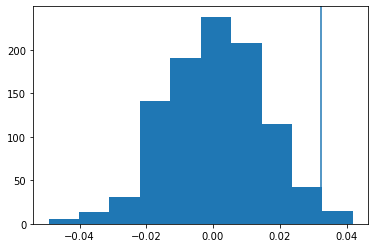

In [34]:
differences = []
for n in list(range(1,1001)):
    sample_a = data.sample(data[data.variation_name=='without_paypal'].shape[0], replace=True)
    sample_b = data.sample(data[data.variation_name=='with_paypal'].shape[0], replace=True)

    bool_4 = sample_a.deliveries_received>1
    bool_5 = sample_a.deliveries_received>=1
    s_a_metric = sample_a.loc[bool_4, 'deliveries_received'].shape[0]/sample_a.loc[bool_5, 'deliveries_received'].shape[0]

    bool_6 = sample_b.deliveries_received>1
    bool_7 = sample_b.deliveries_received>=1
    s_b_metric = sample_b.loc[bool_6, 'deliveries_received'].shape[0]/sample_b.loc[bool_7, 'deliveries_received'].shape[0]

    diff = s_b_metric-s_a_metric
    differences.append(diff)

plt.hist(differences)
plt.axvline(initial_diff)
plt.show()

In [35]:
def ab_test_mean_difference (column):
    
    # Initial difference
    bool_0 = (data.variation_name=='without_paypal') & (data.deliveries_received>1)
    bool_1 = (data.variation_name=='without_paypal') & (data.deliveries_received>=1)
    metric_a = data.loc[bool_0, 'deliveries_received'].shape[0]/data.loc[bool_1, 'deliveries_received'].shape[0]
    metric_a

    bool_2 = (data.variation_name=='with_paypal') & (data.deliveries_received>1)
    bool_3 = (data.variation_name=='with_paypal') & (data.deliveries_received>=1)
    metric_b = data.loc[bool_2, 'deliveries_received'].shape[0]/data.loc[bool_3, 'deliveries_received'].shape[0]
    metric_b

    initial_diff = metric_b - metric_a
    
    # Sampling distribution
    differences = []
    for n in list(range(1,1001)):
        sample_a = data.sample(data[data.variation_name=='without_paypal'].shape[0], replace=True)
        sample_b = data.sample(data[data.variation_name=='with_paypal'].shape[0], replace=True)

        bool_4 = sample_a.deliveries_received>1
        bool_5 = sample_a.deliveries_received>=1
        s_a_metric = sample_a.loc[bool_4, 'deliveries_received'].shape[0]/sample_a.loc[bool_5, 'deliveries_received'].shape[0]

        bool_6 = sample_b.deliveries_received>1
        bool_7 = sample_b.deliveries_received>=1
        s_b_metric = sample_b.loc[bool_6, 'deliveries_received'].shape[0]/sample_b.loc[bool_7, 'deliveries_received'].shape[0]

        diff = s_b_metric-s_a_metric
        differences.append(diff)

        
    # Calculate p value
    extreme = []
    for element in differences:
        if element >= initial_diff:
            extreme.append(1)
        else:
            extreme.append(0)
    p_value = sum(extreme)/len(extreme)
    if p_value >= 0.5:
        p_value_2 = 1 - p_value
    else:
        p_value_2 = p_value
    p_value_2 = round(p_value_2, 3)
    
    # Plot the result
    plt.figure(figsize=(10,6))
    pd.Series(differences).plot.hist(alpha=0.8, label='Sampling distribution')
    plt.title('p value: '+ str(p_value_2))
    plt.axvline(pd.Series(differences).mean(), label="Samples' mean difference", color='Green')
    plt.axvline(initial_diff, label= 'Initial difference', color = 'Red')    
    plt.axvline(np.percentile(differences, 97.5), color='Orange', label= 'Confidence interval ')
    plt.axvline(np.percentile(differences, 2.5), color='Orange')
    plt.legend()
    return plt.show()

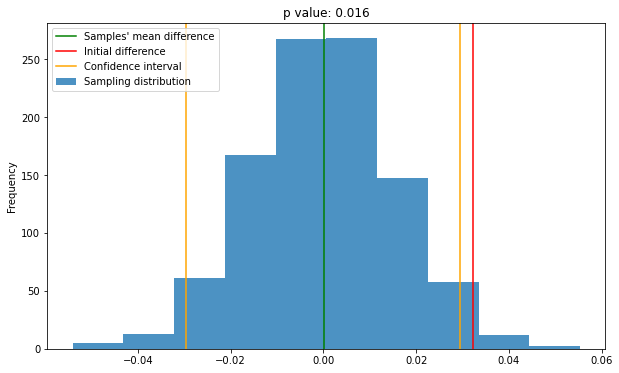

In [37]:
ab_test_mean_difference('deliveries_received')